In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_allstarfull = pd.read_csv('data/AllstarFull.csv')
df_salaries = pd.read_csv('data/Salaries.csv')
df_batting = pd.read_csv('data/Batting.csv')
df_pitching = pd.read_csv('data/Pitching.csv')
df_teams = pd.read_csv('data/Teams.csv')

## 年棒の全般的分析
* 毎年の球界全体の年俸推移分析

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

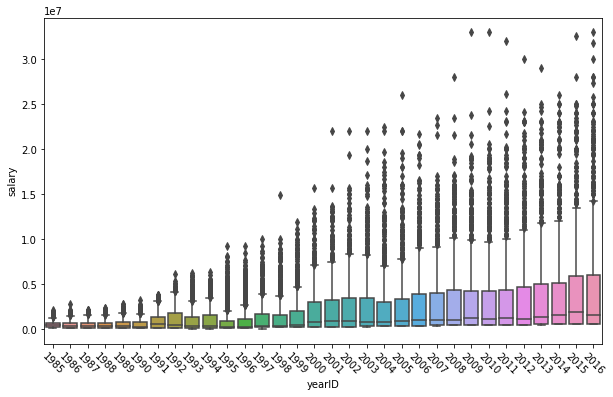

In [37]:
fig, axs = plt.subplots(figsize=(10,6))
df_salaries_nonzero = df_salaries[df_salaries.salary > 0]
sns.boxplot(x=df_salaries_nonzero['yearID'], y=df_salaries_nonzero['salary'])
plt.xticks(rotation=-45)
# df_salaries.describe()

### <認識できたポイント>
* 年棒額は球界全体で毎年アップしている。

### <疑問点>
* 年棒0とはどういう状態なのか、なぜNullではないのか

## 打者の打撃分析

In [7]:
df_b = df_batting.loc[:, ['playerID', 'yearID', 'teamID', 'H', 'RBI', 'HR', 'AB', 'BB', 'HBP', 'SH', 'SF']]
s_1b = df_batting['H'] - (df_batting['2B']+df_batting['3B']+df_batting['HR'])
s_tb = s_1b + df_batting['2B']*2 + df_batting['3B']*3 + df_batting['HR']*4
df_b['AVG'] = df_batting['H'] / df_batting['AB']
df_b['SLG'] = s_tb.divide(df_batting['AB'])
# OBP = (H + BB + HBP) / (AB + BB + HBP + SF)
df_b['OBP'] = (df_batting['H']+df_batting['BB']+df_batting['IBB']) / (df_batting['AB']+df_batting['BB']+df_batting['HBP']+df_batting['SF'])
df_b['OPS'] = df_b['OBP'] + df_b['SLG']
df_b['BB/SO'] = df_batting['BB'].divide(df_batting['SO'])
# print(df_batting[df_batting.playerID == 'ynoara01'])

df_b = pd.merge(df_b, df_teams[['yearID', 'teamID', 'G']], on=['yearID', 'teamID'], how='left')

# 規定打席到達者のみに絞る
def is_regulated(args):
    ab, bb, hbp, sh, sf, g = args
    if ab+bb+hbp+sh+sf  > int(g*3.1):
        return 1
    else:
        return 0
df_b['regulated'] = df_b[['AB', 'BB', 'HBP', 'SH', 'SF', 'G']].apply(is_regulated, axis=1)    
df_b = df_b[df_b.regulated == 1]

df_b = df_b.replace([np.inf, -np.inf], np.nan)
df_b = df_b.dropna(subset=['AVG', 'SLG', 'OBP', 'BB/SO'])
# print(df_b.isnull().any())

df_b.tail()

,playerID,yearID,teamID,H,RBI,HR,AB,BB,HBP,SH,SF,AVG,SLG,OBP,OPS,BB/SO,G,regulated
102738,vogtst01,2016,OAK,123,56.0,14,490,35,4.0,0.0,3.0,0.251020,0.406122,0.302632,0.708754,0.421687,162,1
102740,vottojo01,2016,CIN,181,97.0,29,556,108,5.0,0.0,8.0,0.325540,0.550360,0.449040,0.999400,0.900000,162,1
102763,werthja01,2016,WAS,128,69.0,21,525,71,4.0,0.0,6.0,0.243810,0.417143,0.328383,0.745526,0.510791,162,1
102800,yelicch01,2016,MIA,172,98.0,21,578,72,4.0,0.0,5.0,0.297578,0.482699,0.376328,0.859027,0.521739,161,1
102813,zobribe01,2016,CHN,142,76.0,18,523,96,4.0,4.0,4.0,0.271511,0.445507,0.389155,0.834661,1.170732,162,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 <a list of 62 Text xticklabel objects>)

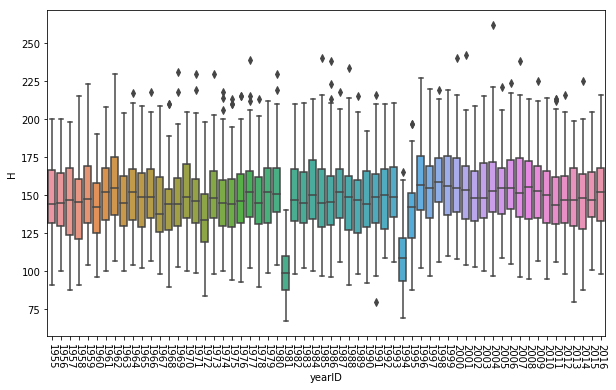

In [8]:
# 打者のヒット数の連年推移を箱ひげ図で表示する
plt.subplots(figsize=(10,6))
sns.boxplot(x=df_b['yearID'], y=df_b['H'])
plt.xticks(rotation=-90)

* ヒット数は毎年、ほぼ一定の推移を示していることが分かる。
* 1981年と1994年のヒット数が少ないが調べてみるとMLBのストライキで試合数が減少していた
* 比率の計算であるならば大丈夫だが、絶対数の計算であればストライキ年は削除した方が良さそう

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 <a list of 62 Text xticklabel objects>)

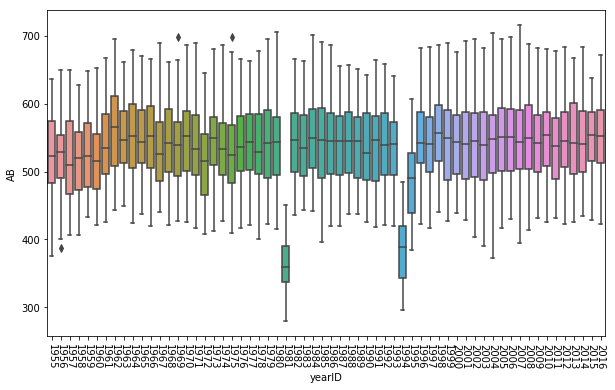

In [9]:
plt.subplots(figsize=(10,6))
sns.boxplot(x=df_b['yearID'], y=df_b['AB'])
plt.xticks(rotation=-90)

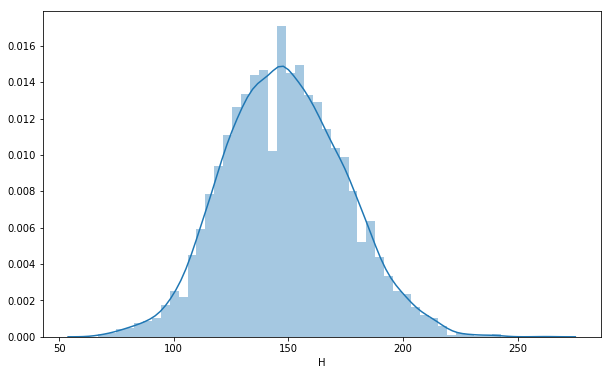

In [10]:
# ヒット数分布
fig, axs = plt.subplots(figsize=(10,6))
sns.distplot(df_b['H'])

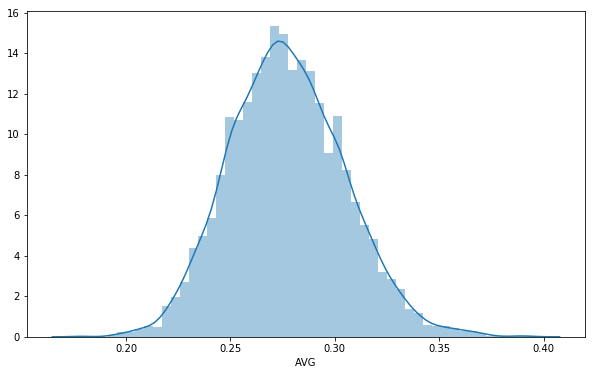

In [11]:
# 打率分布
fig, axs = plt.subplots(figsize=(10,6))
sns.distplot(df_b['AVG'])

### <認識できたポイント>
* ヒット数は正規分布に従う
* 打率は正規分布に従う

### <疑問点>
* なぜ140本近辺に深い窪みがあるのか

## 打者の年棒分析

In [12]:
df_bat_sal = pd.merge(df_b, df_salaries[['playerID', 'salary']], on='playerID', how='inner')
# salaryが0の選手がいるから0以上に絞り込む
df_bat_sal = df_bat_sal[df_bat_sal.salary > 0]
df_bat_sal.describe()

,yearID,H,RBI,HR,AB,BB,HBP,SH,SF,AVG,SLG,OBP,OPS,BB/SO,G,regulated,salary
count,56234.000000,56234.000000,56234.000000,56234.000000,56234.000000,56234.000000,56234.000000,56234.000000,56234.000000,56234.000000,56234.000000,56234.000000,56234.000000,56234.000000,56234.000000,56234.0,5.623400e+04
mean,1998.172831,151.898833,77.326351,19.126614,537.993740,57.675321,4.750987,2.545311,4.972063,0.281668,0.455165,0.354640,0.809805,0.720927,159.072981,1.0,4.145569e+06
std,9.808762,26.367753,25.346763,11.458033,67.202278,23.849492,4.130300,3.809083,2.642954,0.027960,0.076781,0.043436,0.110561,0.401016,10.751294,0.0,5.019490e+06
min,1963.000000,67.000000,13.000000,0.000000,279.000000,9.000000,0.000000,0.000000,0.000000,0.178571,0.233251,0.233333,0.509169,0.093750,103.000000,1.0,6.000000e+04
25%,1991.000000,133.000000,58.000000,10.000000,492.000000,41.000000,2.000000,0.000000,3.000000,0.262500,0.400380,0.324478,0.731565,0.455556,162.000000,1.0,5.500000e+05
50%,1999.000000,151.000000,76.000000,18.000000,543.000000,54.000000,4.000000,1.000000,5.000000,0.280405,0.449524,0.351079,0.797662,0.628099,162.000000,1.0,2.140897e+06
75%,2006.000000,170.000000,95.000000,27.000000,588.000000,72.000000,6.000000,4.000000,7.000000,0.300179,0.502455,0.378523,0.873770,0.875000,162.000000,1.0,5.812595e+06
max,2016.000000,262.000000,165.000000,73.000000,716.000000,232.000000,35.000000,39.000000,18.000000,0.393795,0.863445,0.789303,1.601636,5.658537,164.000000,1.0,3.300000e+07


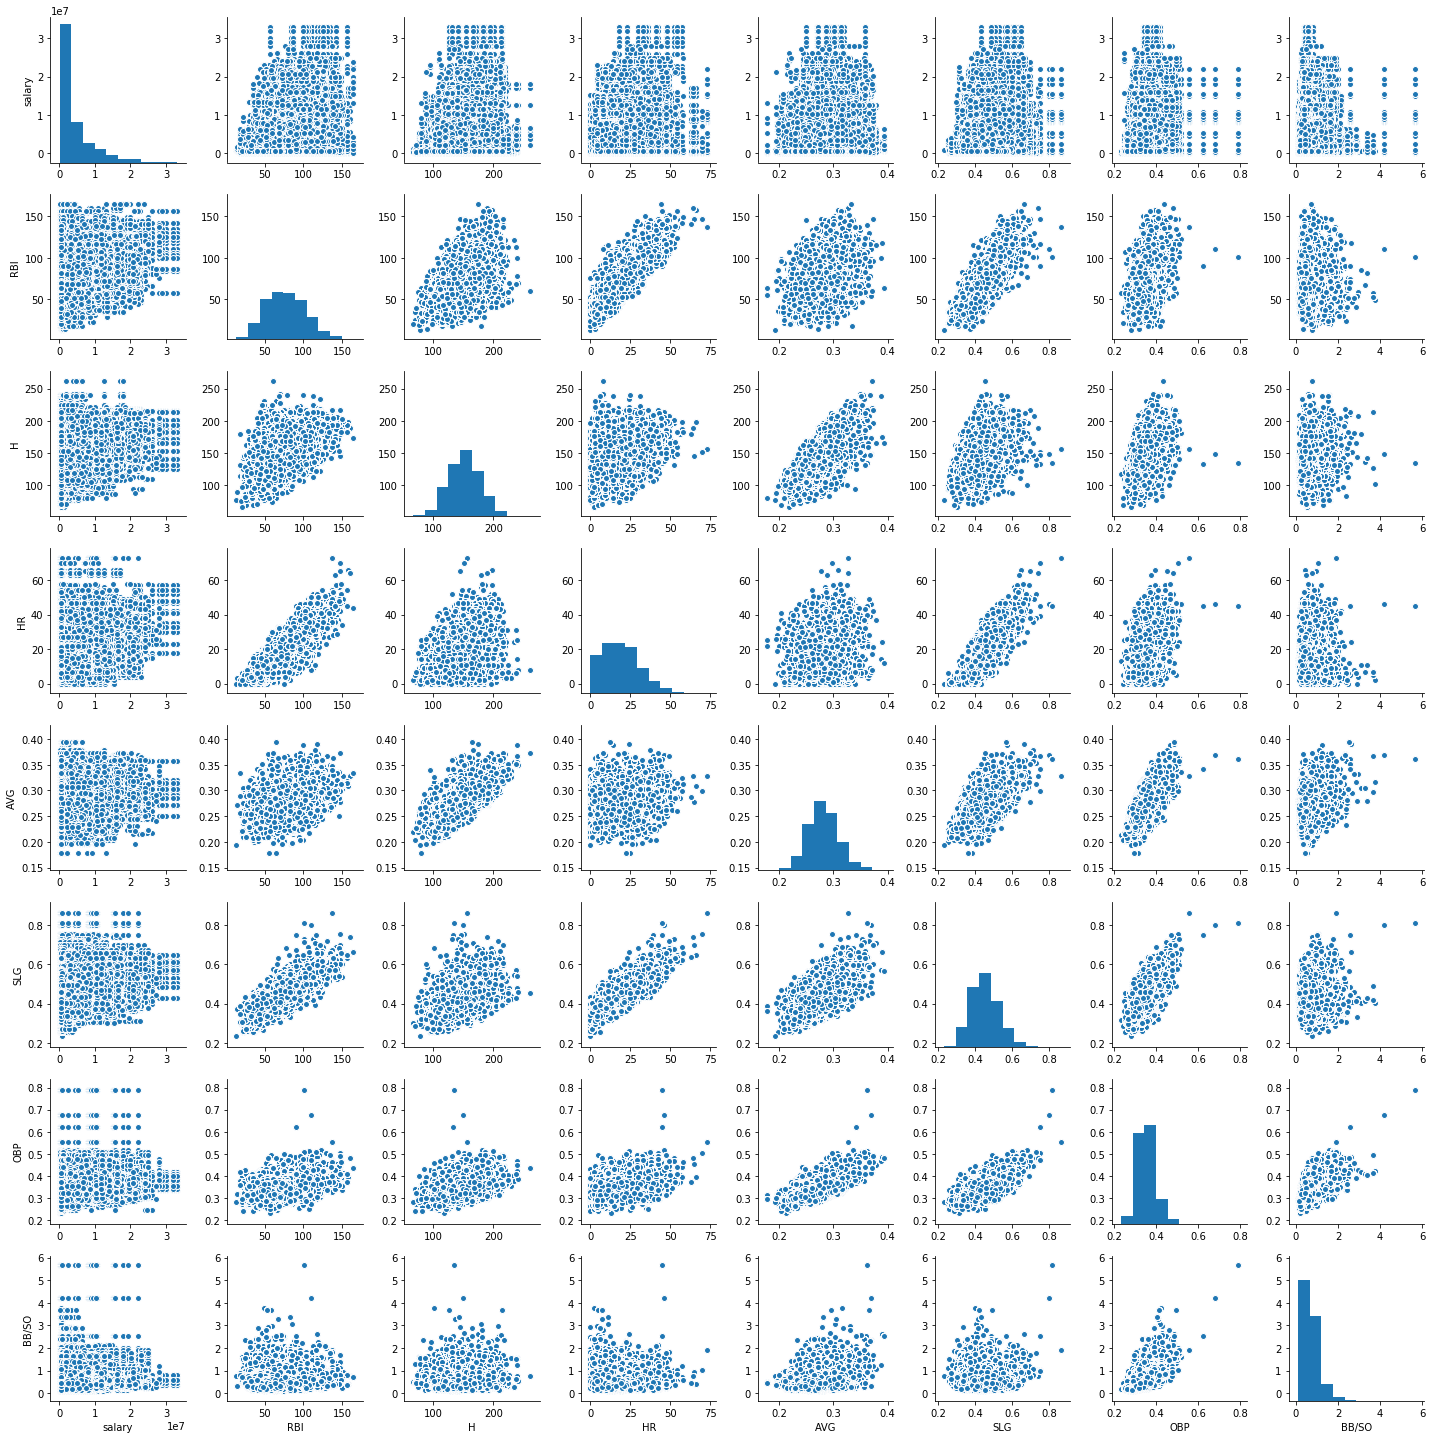

In [38]:
# 年棒と各打撃指標の散布図一覧
sns.pairplot(df_bat_sal[['salary', 'RBI', 'H', 'HR', 'AVG', 'SLG', 'OBP', 'BB/SO']])

* 年棒が高い打者になるにつれて、打撃指標の下限は右肩上がりになっている
* しかし年棒が低い打者でも高年棒打者と同じくらいの打撃指標を達成している選手はいる

### <疑問点>
* 年棒があがっていない若手が毎年のようにでてくるため、年棒の低い打者でも打撃指標が高い選手がいるということか
* または選手の年棒が毎年高まる傾向にあるため、過去の選手は当時の高年棒であってもMLBの歴史のなかでは年棒の低い打者に該当されてしまっているということも考えられるか
* または他に年棒に影響がありそうな打撃指標を見逃しているのか
* または野手としての守備能力など打撃以外の要素が年棒に影響しているためか

## Allstar選手のSalary分析
Allstar選手の年俸平均額と最高額と選手全体の年棒平均額と最高額を比較分析して、年俸アップの状況を測定する。

In [46]:
df_allstar = pd.merge(df_allstarfull, df_salaries[['playerID', 'salary']], on='playerID', how='inner')
df_allstar.head()
# df_allstar.describe()

,yearID,gameNum,GP,startingPos,salary
count,29363.000000,29363.0,29226.000000,9368.000000,2.936300e+04
mean,1998.340054,0.0,0.834120,5.159159,5.056189e+06
std,10.129815,0.0,0.371979,2.751198,5.707956e+06
min,1956.000000,0.0,0.000000,0.000000,6.000000e+04
25%,1991.000000,0.0,1.000000,3.000000,7.500000e+05
50%,1999.000000,0.0,1.000000,5.000000,2.861113e+06
75%,2006.000000,0.0,1.000000,8.000000,7.500000e+06
max,2016.000000,0.0,1.000000,10.000000,3.300000e+07


In [51]:
df_general_mean = df_salaries[['playerID', 'salary']].groupby(['playerID'], as_index=False).mean().sort_values(by='salary', ascending=False)
df_general_max = df_salaries[['playerID', 'salary']].groupby(['playerID'], as_index=False).max().sort_values(by='salary', ascending=False)

In [47]:
df_allstar_mean = df_allstar[['playerID', 'salary']].groupby(['playerID'], as_index=False).mean().sort_values(by='salary', ascending=False)
df_allstar_max = df_allstar[['playerID', 'salary']].groupby(['playerID'], as_index=False).max().sort_values(by='salary', ascending=False)

Text(0.5,1,'General')

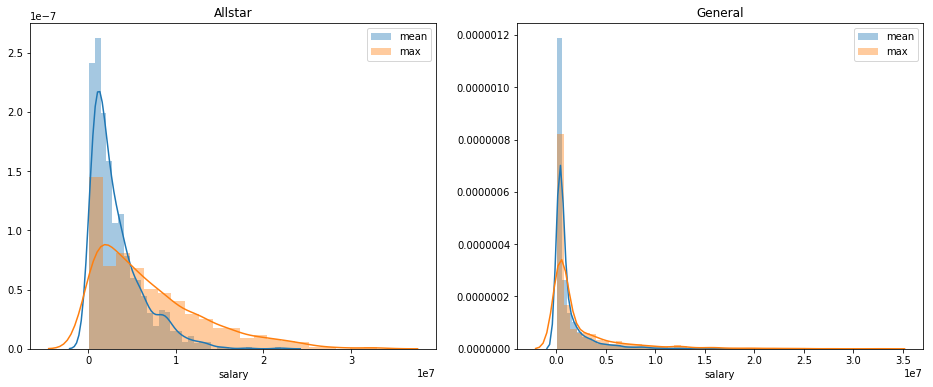

In [58]:
fig, axs = plt.subplots(figsize=(16,6), ncols=2)
sns.distplot(df_allstar_mean['salary'], label='mean', ax=axs[0])
sns.distplot(df_allstar_max['salary'], label='max', ax=axs[0])
sns.distplot(df_general_mean['salary'], label='mean', ax=axs[1])
sns.distplot(df_general_max['salary'], label='max', ax=axs[1])
axs[0].legend()
axs[0].set_title('Allstar')
axs[1].legend()
axs[1].set_title('General')

### <認識できたポイント>
* Allstar選手の年俸額について、各選手の複数年の平均額と複数年の中の最高額を比較した結果、その差額は数億円程となり、毎年の年俸アップ率の高さを物語っている。
* 一方、全選手でみると複数年の平均額と複数年の中の最高額を比較した結果、著しい乖離はない

### <疑問点>
* Allstarに出場することで知名度があがり、人気選手になることが年棒に直結するということか

## 優勝チームの年棒分析

In [20]:
# 2016年現在に存在している30チームを抽出する
teams = df_teams[df_teams.yearID == 2016].groupby(['teamID'])['teamID'].unique().values
teams_30 = []
for team in teams:
    teams_30.append(team[0])
df_salaries_30 = df_salaries.loc[df_salaries['teamID'].isin(teams_30)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

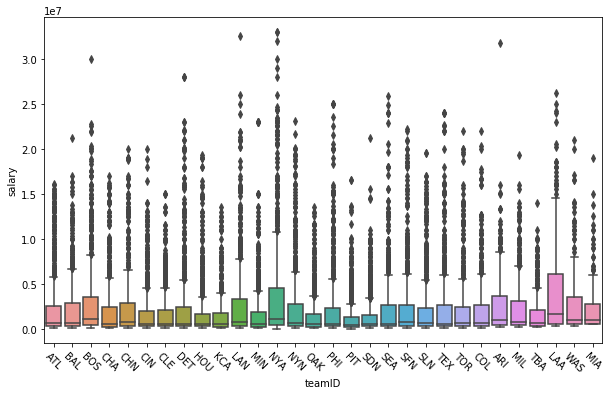

In [21]:
# 現存する30球団に所属する選手の給料のばらつきを箱ひげ図で表示
fig, axs = plt.subplots(figsize=(10,6))
sns.boxplot(x=df_salaries_30['teamID'], y=df_salaries_30['salary'])
plt.xticks(rotation=-45)

* LAAとNYAが給料が高い選手の多い球団である
* BOSやDET、LAN、ARIには他のチームメイトよりも著しく高い年棒のプレイヤーが在籍していた

In [22]:
# print(df_teams.isnull().any())
# print(df_teams.describe())

df_win = df_teams.dropna(subset=['WSWin'])[['teamID', 'WSWin', 'Rank', 'yearID']]
df_win.head()

,teamID,WSWin,Rank,yearID
125,BFN,N,3,1884
126,BL2,N,6,1884
128,BR3,N,9,1884
129,BSN,N,2,1884
131,CHN,N,5,1884


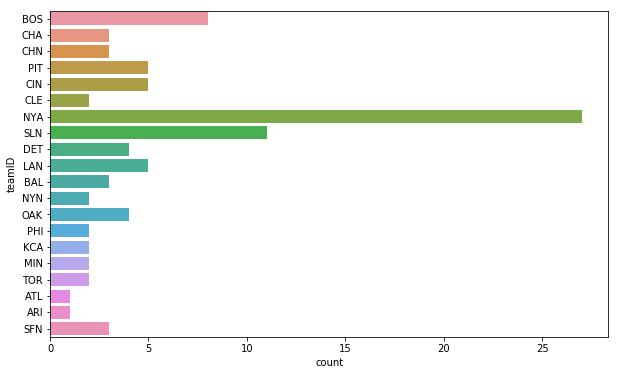

In [23]:
# ワールドシリーズの優勝回数
fig, axs = plt.subplots(figsize=(10, 6))
df_wswin = df_win[df_win.WSWin == 'Y']
sns.countplot(y='teamID', data=df_wswin.loc[df_wswin['teamID'].isin(teams_30)])

* NYAはワールドシリーズの優勝回数が多い
* 同じ給料が高い選手が多い球団であるLAAが記載されていないのは球団名がANAからLAAに変わったためであると考えられる

#### <わかったこと>
良いデータを作るには球団の歴史を知った上で、データをまとめる必要もある

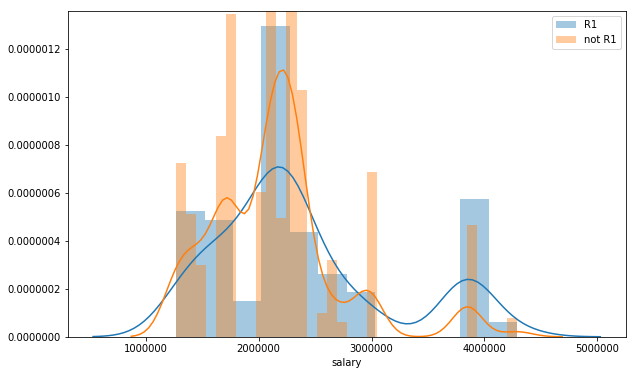

In [24]:
# リーグ1位チームとそれ以外のチームの平均給料の分布比較
df_salaries_mean = df_salaries_30.groupby('teamID', as_index=False).mean()[['teamID', 'salary']]
df_win_sal = pd.merge(df_win, df_salaries_mean, on='teamID', how='inner')
df_win_sal.head()
df_r1team_sal = df_win_sal[df_win_sal.Rank == 1]
df_rnteam_sal = df_win_sal[df_win_sal.Rank != 1]

fig, axs = plt.subplots(figsize=(10,6), sharey=True)
sns.distplot(df_r1team_sal['salary'], label='R1')
sns.distplot(df_rnteam_sal['salary'], label='not R1')
plt.legend()

* リーグ1位になるチームの方が平均給料の高めの箇所の分布が多い
* 一方で、全球団で頻出数の多い2300000ドル近辺の頻度はリーグ1のチームの方がその他より頻度が低い

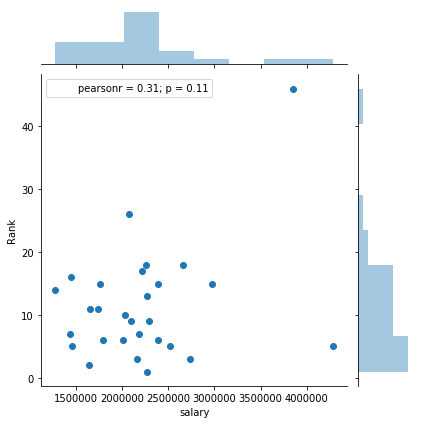

In [25]:
# 球団の平均給料とリーグ順位の散布図
df_salaries_mean = df_salaries_30.groupby('teamID', as_index=False).mean()[['teamID', 'salary']]
df_rank_count = df_win[df_win.Rank == 1].groupby('teamID', as_index=False).count()
df_rank_sal = pd.merge(df_rank_count, df_salaries_mean, on='teamID', how='inner')

sns.jointplot('salary', 'Rank', data=df_rank_sal)

* 平均給料が高くなればなるほどリーグ1位になる傾向がはっきりとあるわけではない

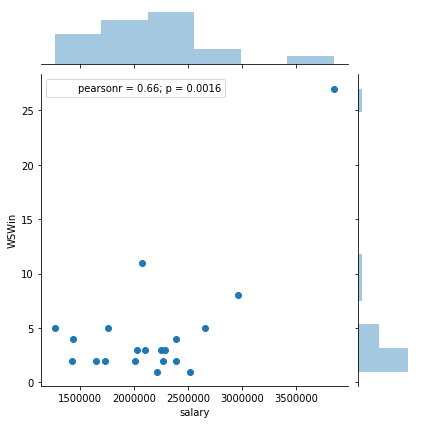

In [40]:
# 球団の平均給料とワールドシリーズ優勝の散布図
df_salaries_mean = df_salaries_30.groupby('teamID', as_index=False).mean()[['teamID', 'salary']]
df_wswin_count = df_win[df_win.WSWin == 'Y'].groupby('teamID', as_index=False).count()
df_wswin_sal = pd.merge(df_wswin_count, df_salaries_mean, on='teamID', how='inner')

sns.jointplot('salary', 'WSWin', data=df_wswin_sal)

* 平均給料が高くなればなるほどワールドシリーズ優勝回数が多くなるわけではない

### <認識できたポイント>
* ランク1のチームの年棒は、球界全体よりも高い
* しかし、平均年棒が高くなればなるほどリーグ1位やワールドシリーズ優勝の数が増えるわけでもない

### <疑問点>
* 貨幣価値の変化の影響も加味すると分析結果も変わるのだろうか